<a href="https://colab.research.google.com/github/chekahchek/Coursera--Approximation-Algorithms-and-Linear-Programming/blob/main/AI6124_Assignment3_Ho_Chek_Hui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI6124 Assignment 3
Created by A/Prof Kai Keng ANG (kkang@i2r.a-star.edu.sg, kkang@ntu.edu.sg). Last modified 8 Oct 2024

Submitted by: Ho Chek Hui Mat ID: G2303025C

# Instructions
Enter your name according to NTU Learn, and your student ID above. Do not include the square brackets. Please save the file as AI6124\_Assignment3\_[Student name].ipynb and submit in NTU Learn. Eg. "AI6124\_Assignment3\_James\_Tan.ipynb".

There are 10 questions in this assignment. Some questions have multiple parts. Marks for each parts are indicated in the questions. Please read the question and hints carefully.


# Objective

After completing this tutorial assignment, you will know:

* The basics of PyTorch
* How PyTorch computes the gradient for backpropagation training
* How to use of GPU for efficient computation in neural networks
* How to use either CPU or GPU for neural networks computation
* What are the different types of membership functions
* How to use existing library to create and plot a fuzzy membership function
* How to approximate one type of membership function using another type
* How to relate python codes to equations of fuzzy membership functions
* How to implement and run the Learning Vector Quantization (LVQ) algorithm
* How to learn a set of winning vectors (or codebook vectors) using LVQ from a training data set.
* How to make predictions using the learned vectors.
* How to form fuzzy membership functions using the learned vectors.

Prerequisites:
1. Python programming. https://docs.python.org/3/tutorial/.
2. Numpy package. https://numpy.org/devdocs/user/quickstart.html
3. Additional PyTorch information: https://pytorch.org/docs/stable/torch.html

There are many PyTorch code and tutorials online. Feel free to learn more from those online code and tutorials. Please run this notebook on Google Colab for the assignment. Feel free to edit and use some code from this notebook for your group project, but please remove the assignment questions and your answers.

# Introduction

First we install the Fuzzy Logic libraries, and import the PyTorch and other libraries.

The Fuzzy logic library is based on Octave fuzzy-logic-toolkit of which is based on Matlab R2018b Fuzzy Logic Toolbox functions. However, not all the functions are working according to Matlab implmentation. There are also other toolboxes out there, such as scikit-fuzzy.

In [1]:
!pip install -U fuzzylab

Then we import the necessary libraries

In [2]:
import numpy as np
import fuzzylab as fz
import math
from math import sqrt
from random import randrange
from random import seed
import os
import time
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_formats = ['svg']
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()
from tqdm.notebook import tqdm
import torch
print("Pytorch version", torch.__version__)

Pytorch version 2.4.1+cu121


# 1. PyTorch basics

Check that you are using version 2.3.1+cu121 or later. For the purpose of of this assignment, we need to set the random seed below. Do not change this value.




In [3]:
torch.manual_seed(0) # Setting the seed

## Initializing Tensors

Tensors are similiar to Numpy arrays, with support for GPU acceleration. A vector is a 1-D tensor. A matrix a 2-D tensor. When working with neural networks, we use tensors of various shapes. There are many ways to initialize a tensor. Simplest:

In [4]:
x = torch.Tensor(3, 2, 4)
print(x)

tensor([[[2.1972e+00, 4.5252e-41, 2.1972e+00, 4.5252e-41],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 1.0103e-42, 0.0000e+00],
         [2.4530e+01, 4.5252e-41, 2.4530e+01, 4.5252e-41]],

        [[1.7749e+28, 7.1447e+31, 3.9172e-02, 4.7429e+30],
         [1.4150e+34, 1.2873e+22, 2.8573e+32, 1.0552e+24]]])


The function `Tensor` allocates memory for the desired tensor, but does not initialize the tensor. It just reuses any values in memory. To allocate memory and initializes the tensor, there are many functions including: `zeros`, `ones`, `rand` etc.

## Tensors <-> Numpy

Tensors can be converted to numpy arrays, and numpy arrays back to tensors. To transform a numpy array into a tensor, use the function `from_numpy`:

In [ ]:
np_arr = np.random.rand(3,2)
print("Numpy array:", np_arr)
tensor = torch.from_numpy(np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[0.20171076 0.58920254]
 [0.58767711 0.45706469]
 [0.53498162 0.57655678]]
PyTorch tensor: tensor([[0.2017, 0.5892],
        [0.5877, 0.4571],
        [0.5350, 0.5766]], dtype=torch.float64)


<font color=red>Question 1(a)</font>: Convert the tensor *x* to numpy in np_arr. <font color='red'>(0.5 mark)</font>

In [ ]:
# Modify the below code here for Question 1(a)
np_arr = x.numpy()
print("Numpy array:", np_arr)

Numpy array: [[[3.4184704e-12 4.5791631e-41 3.4184704e-12 4.5791631e-41]
  [6.7120999e-07 1.9989857e+20 1.0082910e-11 1.7154304e-07]]

 [[5.4075694e+22 6.4105438e-10 2.1707407e-18 4.5447454e+30]
  [7.0062382e+22 2.1714819e-18 4.5447454e+30 7.0062382e+22]]

 [[2.1707407e-18 1.9283841e+31 3.2313995e-18 9.6634558e-06]
  [2.1040917e+23 1.0140866e-11 1.7567493e-04 5.3692773e-05]]]


### Operations on Tensors

Operations for numpy are also available for PyTorch. https://pytorch.org/docs/stable/tensors.html#. For example, to add two tensors:

In [ ]:
x1 = torch.rand(3, 3)
x2 = torch.rand(3, 3)
y = x1 + x2

print("x1", x1)
print("x2", x2)
print("y", y)

x1 tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341],
        [0.4901, 0.8964, 0.4556]])
x2 tensor([[0.6323, 0.3489, 0.4017],
        [0.0223, 0.1689, 0.2939],
        [0.5185, 0.6977, 0.8000]])
y tensor([[1.1286, 1.1171, 0.4902],
        [0.1544, 0.4763, 0.9280],
        [1.0086, 1.5941, 1.2556]])


Other operations include matrix multiplications that are essential for neural networks. For example, an input vector $\mathbf{x}$ multiplied by a weight matrix $\mathbf{W}$. Matrix multiplication can be performed by `matmul`, `mm`, `bmm` etc.

In [ ]:
x = torch.arange(6)
x = x.view(2, 3)
print("x", x)
w = torch.randn(3, 3)
print("w", w)

x tensor([[0, 1, 2],
        [3, 4, 5]])
w tensor([[-0.2613,  1.0667,  0.4159],
        [ 0.8396, -0.8265, -0.7949],
        [-0.9528,  0.3717,  0.4087]])


<font color=red>Question 1(b)</font>: Compute h by multiplying *x* with *w*. <font color=blue>Hint: Do not modify the code above and do not insert additional line of code</font><font color='red'> (0.5 mark)</font>

In [ ]:
# Modify the below code here for Question 1(b)
h = torch.matmul(x.float(), w)
print("h", h)

h tensor([[-1.0661, -0.0830,  0.0225],
        [-2.1899,  1.7528,  0.1115]])


# 2. Backpropagation using computation graph

One advantage of using PyTorch for deep learning is that the **gradients/derivatives** of functions can be computed easily. Given an input $\mathbf{x}$, we can define functions based on the input, usually by matrix-multiplications with matrices and additions with vectors. This can be viewed as a **computational graph** that shows how to compute the output based on the input input.

Recap from the slides in AI6124 lecture 8, we compute the **error** in neural networks based on the difference in predicting output $y$ given input $\mathbf{x}$. We then use this this **error** and the gradient to **update/train** the weights $\mathbf{W}$ to move the output $y$ closer when present with input $\mathbf{x}$.

Thus need to specify which tensors require gradients. By default, when we create a tensor, it does not require gradient.

In [ ]:
x = torch.ones((3,3))
print(x)
print(x.requires_grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
False


We can modify an existing tensor using the function `requires_grad_()`, or when creating a tensor, we can initialize with parameter `requires_grad=True`.

In [ ]:
x.requires_grad_(True)
print(x.requires_grad)

True


To understand how the gradient is computed from a computation graph, we have to look at an example:

$$y = \frac{1}{n(x)}\sum_i \left[(x_i + 3)^2 + 4\right],$$

where $n(x)$ denotes the number of elements in $x$, $x$ are the inputs, $y$ is the output.

For our example, we'll use $\mathbf{x}=[0,1,2]$ as our input.

In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


Now we compute the function step by step. We can combine multiple operations in a single line, but we separate them to visualize each operation in a computation graph.

In [ ]:
a = x + 3
b = a ** 2
c = b + 4
y = c.mean()
print("Y", y)

Y tensor(20.6667, grad_fn=<MeanBackward0>)


Using the statements above, the computation graph looks like:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1-RPnuYqMsLisi6o38_cRS9FlY0ZdN_eo'width="200"/>
</figure>

We computate $a$ based on the inputs $x$ and the constant 3, then compute $b$ based on $a$ squared, then compute $c$ is based on $b$ and the constant 4, and finally compute $y$ based on the mean of $c$. Each node of the computation graph has automatically defined a function for calculating the gradients with respect to its inputs, `grad_fn`. You can see this when we printed the output tensor $y$. We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`:

In [ ]:
y.backward()

`x.grad` will now contain the gradient $\partial y/ \partial \mathcal{x}$, and this gradient indicates how a change in $\mathbf{x}$ will affect output $y$ given the current input $\mathbf{x}=[0,1,2]$:

In [ ]:
print(x.grad)

tensor([2.0000, 2.6667, 3.3333])


These gradients can be verified by calculating using the chain rule:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

Note that this equation is simplified using index notation, and all operation besides the mean do not combine the elements in the tensor.

<font color=red>Question 2</font>: Calculate the partial derivatives by hand using the input $\mathbf{x}=[0,1,2]$, then calculate the gradients $\partial y/\partial \mathbf{x}$ and provide the answers in exact partial fractions below</font><font color='red'> (1 mark)</font>

Enter the answers to Question 3 here. Keep your answers in whole number or partial fractions.

The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

and the gradients $\partial y/\partial \mathbf{x}=[2,\frac{8}{3}, \frac{10}{3}]$

# 3. Graphics Processing Unit (GPU)

The use of GPU is crucial for deep learning. A GPU can perform many computations in parallel, especially matrix operations in neural networks.

GPUs, although not necessary, helps to accelerate the training of your neural network. PyTorch supports GPU. First, check if a GPU available.

In [ ]:
gpu_avail = torch.cuda.is_available()
print(f"GPU available: {gpu_avail}")
if gpu_avail:
  torch.cuda.manual_seed(0)
  torch.cuda.manual_seed_all(0)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False


GPU available: True


`GPU availabe` will show false by default. GPU is available in Google Colab if you select a GPU in your runtime setup. Click on `Change runtime type`, select `T4 GPU`, then rerun the code till the `GPU available` in the code above is true before proceeding further in this assignment. Otherwise, the subsequent code will not run.

Note that free GPU resources in Google colab is limited. Once you finished Q3, you can change runtime back to CPU only.

The random seed between CPU and GPU is not synchronized. Thus we need to set the seed on the GPU too. Also do not modify the GPU seed for this assignment. Some operations on GPUs are implemented stochastically for efficiency. We also need to ensure that all operations are deterministic on GPU for reproducibility, especially for this assignment.

All the tensors created previously were stored on the CPU. You store a tensor to the GPU by using the function `.to(...)`, or `.cuda()`. It is also good practice to define a `device` for GPU if there is one and for CPU if there is no GPU. However, for this assignment, we need to use GPU for this section. Google may restrict your use of GPU in Colab after you quota is reached, so use GPU sparingly.

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


<font color=red>Question 3</font>: Modify the code below to compare the execution time for computing a large matrix multiplication on the CPU with the same operation on the GPU. <font color=blue>Hint: You see `device='cuda:0'` next to your tensor if it is in the GPU. </font><font color='red'> (1 mark)</font>

In [ ]:
# Modify the below code here for Question 5
if not gpu_avail:
  raise Exception(f"This cell requires GPU to run")

# Initialize the tensor
x = torch.rand(8124, 8124)

# Compute using CPU
print("x", x)
start_time = time.time()
y = torch.matmul(x, x)
end_time = time.time()
cpu_time = end_time - start_time
print(f"CPU time: {cpu_time:6.2f}s")

# Compute using GPU
x = x.to(device)
print("x", x)
# Hint: need to use cuda timing functions GPU
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
y = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()
gpu_time = start.elapsed_time(end) * 10**-3 #Convert ms to s
print(f"GPU time: {gpu_time:6.2f}s")

# Compute the speed up using GPU
print(f"Speed up: {cpu_time/gpu_time:6.2f}x")

x tensor([[0.8264, 0.5688, 0.8345,  ..., 0.6863, 0.9087, 0.0754],
        [0.3050, 0.6566, 0.9146,  ..., 0.9940, 0.5392, 0.1736],
        [0.0282, 0.2715, 0.2904,  ..., 0.8425, 0.0870, 0.8340],
        ...,
        [0.9566, 0.2081, 0.2899,  ..., 0.5067, 0.8489, 0.0532],
        [0.0651, 0.2818, 0.4787,  ..., 0.0275, 0.8864, 0.8663],
        [0.7033, 0.6837, 0.3414,  ..., 0.1606, 0.9600, 0.1015]])
CPU time:  14.02s
x tensor([[0.8264, 0.5688, 0.8345,  ..., 0.6863, 0.9087, 0.0754],
        [0.3050, 0.6566, 0.9146,  ..., 0.9940, 0.5392, 0.1736],
        [0.0282, 0.2715, 0.2904,  ..., 0.8425, 0.0870, 0.8340],
        ...,
        [0.9566, 0.2081, 0.2899,  ..., 0.5067, 0.8489, 0.0532],
        [0.0651, 0.2818, 0.4787,  ..., 0.0275, 0.8864, 0.8663],
        [0.7033, 0.6837, 0.3414,  ..., 0.1606, 0.9600, 0.1015]],
       device='cuda:0')
GPU time:   0.34s
Speed up:  41.35x


Depending on the size of the matrix and the specific CPU/GPU, the speedup can be very significant for a large matrix. Since the `matmul` operation is commonly used in neural networks, there will be significant speedup in training a large neural network using GPU. Note that the time estimate may not be accurate since it was not executed for multiple times.


# 4. torch.nn package

To build a neural network in PyTorch, we need to specify all our parameters such as weight matrices, bias vectors using `Tensors`, call the PyTorch to compute the gradients, and then train the parameters in the model using the data available. This can be tedious and cumbersome to code.

Fortunately there is a package called `torch.nn` that facilitates building neural networks. The package `torch.nn` defines a series of useful classes like linear networks layers, activation functions, loss functions etc. There is also `torch.nn.functional` that contains functions that are used in network layers. Refer https://pytorch.org/docs/stable/nn.html

In [5]:
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(0) # Setting the seed again

We will now build a simple neural network in PyTorch using a simple classifier on a simple dataset: XOR.

### The simple dataset: XOR

Using two dimensional inputs $x_1$ and $x_2$, the XOR predicts 1 if either $x_1$ or $x_2$ is 1, otherwise predicts 0. PyTorch has `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` and for creating custom dataset and for loading datasets. Refer  https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [ ]:
import torch.utils.data as data

We first need to create a function to generate the XOR data using the Dataset class:

In [ ]:
class XORDataset(data.Dataset):
    def __init__(self, size, std=0.2):
        """
        Parameters:
            size - Number of data points we want to generate
            std  - Standard deviation of noise added to data
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_xor()

    def generate_xor(self):
        # Each data point in the XOR dataset has variables, x1, x2 and y
        # The label y is the XOR combination of x1 and x2
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # Add gaussian noise with std to the data points.
        data += self.std * torch.randn(data.shape)
        self.data = data
        self.label = label

    def __len__(self):
        # Number of data points.
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

Now we create the training and test datasets and look at the data:

In [ ]:
train_dataset = XORDataset(size=2500)
test_dataset = XORDataset(size=500)

print("Size of dataset:", len(train_dataset))
print("Data point 0 and label:", train_dataset[0])
print("Data point 101 and label:", train_dataset[101])

Size of dataset: 2500
Data point 0 and label: (tensor([-0.4713,  1.1160]), tensor(1))
Data point 101 and label: (tensor([ 0.9783, -0.0781]), tensor(1))


Printing the data points does not help to understand the data. Especially if the two data points printed belongs to the same label. It is easiler to plot the data to visualize.

In [ ]:
def visualize_samples(data, label, plottitle):
    # Convert to tensor to numpy
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure()
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor='black', label="$y$=0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor='black', label="$y$=1")
    plt.title(plottitle)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    plt.xlim(-1,2)
    plt.ylim(-1,2)
    plt.legend()

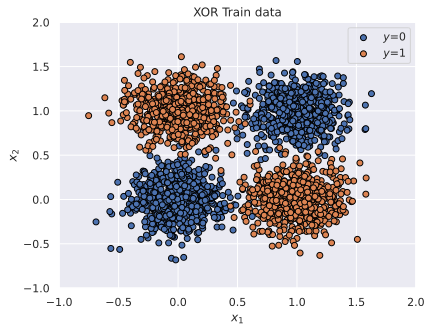

In [ ]:
visualize_samples(train_dataset.data, train_dataset.label, 'XOR Train data')
plt.show()

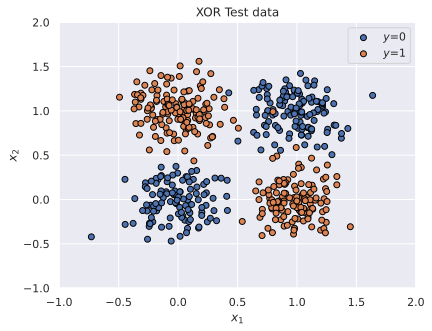

In [ ]:
visualize_samples(test_dataset.data, test_dataset.label, 'XOR Test data')
plt.show()

When you examine the plot of the XOR Train and Test data, you will find that there are some outliers from one label that are wrongly placed in another label. This is intentionally generated because real world data are similar.

Now we need to define the data loader class, which can iterate over the dataset with support for automatic batching, multi-process data loading and many more features.

We do not need to define a dataloader class for the XOR dataset like the XORDataset class, but just need to create an object of it with the dataset as input. We will need to configure the data loader with the following input arguments:

* `batch_size`: Number of samples to stack per batch
* `shuffle`: To randomize the order of the data for training.

There are other parameters you can configure for the dataloader. Refer https://pytorch.org/docs/stable/data.html

In [ ]:
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

### Defining the neural network module

In PyTorch, a neural network is built up out of modules. An example module is as follows:

In [ ]:
class MyModule(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()
        self.linear1 = nn.Linear(num_inputs, num_outputs)
        self.act_fn = nn.ReLU()

    def forward(self, x):
        # Function for performing the calculation of the module.
        x = self.linear1(x)

The forward function is where the computation is executed when you call the module (`nn = MyModule(); nn(x)`). The init function is where the module is create using parameters, or defining other modules that are used in the forward function. The backward calculation is computed automatically but can be overwritten if needed.


<font color=red>Question 4</font>: Modify the SimpleClassifier below to define a neural network with a input layer, one hidden layer with sigmoid as activation function, and a output layer. We do not need to have a sigmoid on the output. This is because other functions, especially the loss, are more efficient and precise to calculate on the original outputs instead of the sigmoid output.</font><font color='red'> (1 mark)</font>

In [ ]:
# Modify the below code here for Question 6
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Sigmoid()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def initialize_weights(self):
        # Add code here to initialize the weights. This is important.
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

For a start, we will create the SimpleClassifier with 2 input neurons, 4 hidden neurons, and 1 output neuron.

In [ ]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
# Print the SimpleClassifier module, its submodules and parameters
print(model)
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Sigmoid()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)
Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


### Training the SimpleClassifier model

During training, the following steps are performed

1. Get a batch from the dataloader
2. Compute predictions from the model for the batch
3. Calculate the loss based on the difference between predictions and labels
4. Backpropagation: calculate the gradients for every parameter with respect to the loss
5. Update the parameters of the model in the direction of the gradients

We need to define the loss function to use in step 3, and the optimizer to use in step 5 before we can start the training.


For binary classification on the XORDataset, we can use the Binary Cross Entropy (BCE) which is defined as follows:

$$\mathcal{L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$

where $y$ are our labels, and $x$ our predictions, both in the range of $[0,1]$.

PyTorch provides a list of predefined loss functions https://pytorch.org/docs/stable/nn.html#loss-functions. For BCE, PyTorch has two functions: `nn.BCELoss()`, `nn.BCEWithLogitsLoss()`. `nn.BCEWithLogitsLoss` combines a sigmoid layer and the BCE loss in a single class, which we can use.

In [ ]:
loss_module = nn.BCEWithLogitsLoss()

For updating the parameters, PyTorch provides the package `torch.optim` that has most popular optimizers implemented. Refer https://pytorch.org/docs/stable/optim.html. We can use the simplest `torch.optim.SGD` Stochastic Gradient Descent, which updates parameters by multiplying the gradients with a small constant, called learning rate, and subtracting those from the parameters (hence minimizing the loss). A good default learning rate for the small network is 0.1.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

The optimizer has two functions: `optimizer.step()`, and `optimizer.zero_grad()`. The former updates the parameters based on the gradients as explained above. The latter  sets the gradients of all parameters to zero. While this function seems less relevant at first, it is a crucial pre-step before performing backpropagation.

Now we are ready to train our model using the train_data_loader we created earlier.

We can push all data and model parameters to CPU or GPU if available. For our small neural network, communication to GPU takes more time than CPU. For larger neural networks, the communication time is significantly smaller than the actual runtime, making a GPU crucial in larger neural networks and larger datasets.

In [ ]:
# Push model to device. Has to be only done once
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Sigmoid()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

Now we need to define the above 5 steps in a train model function, which has to call  `model.train()`. There are also some modules that need to perform a different forward step during training than during testing, such as BatchNorm and Dropout.

In [ ]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=50):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            # Remember to call zero_grad before calculating the gradients
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()

In [ ]:
model.initialize_weights()
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/50 [00:00<?, ?it/s]

### Saving the trained model

After we finished training the model, we need to save the model so that we can load the trained parameters when needed. This can be performed by looking at `state_dict` from the model that contains all learnable parameters.

In [ ]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-0.6299, -0.6272],
        [-0.6326,  1.0393],
        [-0.4908,  0.4698],
        [-0.9632, -1.1556]])), ('linear1.bias', tensor([ 0.0271,  0.4710,  0.2012, -0.4604])), ('linear2.weight', tensor([[-0.1360, -0.4815,  0.2494, -1.1484]])), ('linear2.bias', tensor([0.4395]))])


To save the trained model, we can use the function `torch.save`:

In [ ]:
torch.save(state_dict, "simple_model.tar")

### Loading the trained model

To load a model, we can use the function `torch.load` to load the state dict from the disk, and the module function `load_state_dict` to overwrite our parameters with the new values:

In [ ]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("simple_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)


<ipython-input-56-b77bbf26c28e>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("simple_model.tar")


<All keys matched successfully>

We can also take a look at the loaded parameters compared to the original. For more information on loading and saving, refer
https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# Compare the newly loaded model with the trained model
print("Trained model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Trained model
 OrderedDict([('linear1.weight', tensor([[-0.6299, -0.6272],
        [-0.6326,  1.0393],
        [-0.4908,  0.4698],
        [-0.9632, -1.1556]])), ('linear1.bias', tensor([ 0.0271,  0.4710,  0.2012, -0.4604])), ('linear2.weight', tensor([[-0.1360, -0.4815,  0.2494, -1.1484]])), ('linear2.bias', tensor([0.4395]))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[-0.6299, -0.6272],
        [-0.6326,  1.0393],
        [-0.4908,  0.4698],
        [-0.9632, -1.1556]])), ('linear1.bias', tensor([ 0.0271,  0.4710,  0.2012, -0.4604])), ('linear2.weight', tensor([[-0.1360, -0.4815,  0.2494, -1.1484]])), ('linear2.bias', tensor([0.4395]))])


### Evaluating the performance of the neural network

Once the model is trained, we can evaluate the performance of the model on the test set. It is important that the test data are separated and not used in the training at all. So it is a good practice to set aside the test data in the beginning.

Now we create a separate data loader for the test data.

In [ ]:
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

There are many performance measures used in the literature. The commonly used and easy to understand metric is accuracy, which is defined as:

$$accuracy = \frac{\text{number of correct predictions}}{\text{number of all predictions}}$$

Accuracy can also be defined as:

$$accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

where TP are the true positives, TN true negatives, FP false positives, and FN the fale negatives.

Similar to the train model part, we need to define a function to evaluate the model, which has to call `model.eval()`. Since we do not need to calculate the gradients, we can deactivate the computation graph to reduce memory usage and speed up the computation by calling `with torch.no_grad()`.

In [ ]:
def eval_model(model, data_loader):
    # Set model to eval mode
    model.eval()
    true_preds, num_preds = 0., 0.

    with torch.no_grad(): # Deactivate gradients calculations to speed up
        for data_inputs, data_labels in data_loader:

            # Evaluate prediction on the test data
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid used here to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Limit predictions to either 0 and 1

            # Count correct predictions to compute accuracy
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    # Compute the accuracy
    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [ ]:
eval_model(model, test_data_loader)

Accuracy of the model: 48.20%


If we trained our model correctly, we should see a score close to >90% and close to 100% accuracy. However, we not getting a good accuracy and thus something is wrong.

<font color=red>Question 5</font>: The accuracy you obtain depends on whether you run on CPU or GPU. Regardless, you need to improve the accuracy. Leverage experience from your hands session in AI6124 to modify the below code to train the model again and evaluate it on the same train and test data to improve the accuracy of the model. <font color=blue>Hint: There is no need to modify the architecture of the neural network, and you have to obtain >90% accuracy. </font></font><font color='red'> (1 mark)</font>

In [ ]:
# Modify the below code here for Question 5
model.initialize_weights()
train_model(model, optimizer, train_data_loader, loss_module, num_epochs=300)
eval_model(model, test_data_loader)

  0%|          | 0/300 [00:00<?, ?it/s]

Accuracy of the model: 97.00%


# 5. Fuzzy Membership Function

The next of this assignment is on fuzzy membership functions. Most common fuzzy membership functions are triangular, trapezodal, Gaussian and bell-shaped.


## Triangle Membership Function

### Syntax

$y = \text{trimf$(x,[a, b, c])$}$

### Description

The triangular membership function of $x$ that depends on 3 parameters $a$, $b$, and $c$, as given by

$\begin{equation} f(x;a,b,c)= \begin{cases} (x - a)/(b - a), &\text{for $a < x < b$}\\ 1, &\text{for $x = b$}\\ (c - x)/(c - b), &\text{for $b < x < c$}\\ 0, &\text{otherwise.} \end{cases} \end{equation}$

$\text{whereby $a < b < c$}$

The parameters $a$ and $c$ define the “feet” of the triangle and the parameter $b$ defines the peak.

The following plots a triangular membership function with 3 parameters

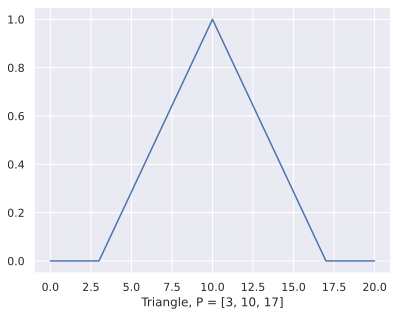

In [6]:
x = np.linspace(0, 20, 101)
y = fz.trimf(x, [3, 10, 17])
plt.plot(x, y)
plt.xlabel('Triangle, P = [3, 10, 17]')
plt.show()

## Gaussian Membership Function

### Syntax

$y = \text{gaussmf$(x,[a, b])$}$

### Description

The Gaussian memebership function of $x$ that depends on 2 parameters $a$, $b$, as given by

$\begin{equation} f(x;a,b)= e^\frac{-(x-b)^2}{2a^2} \end{equation}$

The parameter $a$ defines the width or standard deviation and the parameter $b$ defines the centre or mean.


<font color='red'>Question 6(a)</font>: Create a Gaussian membership function similar to the above trianglular membership function centered at 10 using gaussmf. <font color='red'>(0.5 mark)</font>


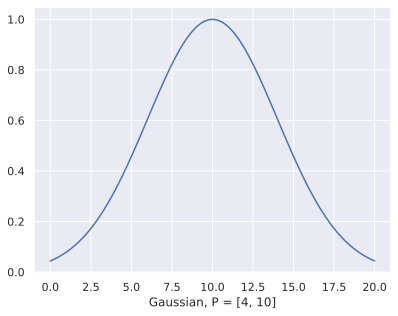

In [ ]:
## Enter your code here for Question 6(a). Some codes are included for you. This code does not execute without modification
y = fz.gaussmf(x, [4, 10])
plt.plot(x, y)
plt.xlabel('Gaussian, P = [4, 10]')
plt.show()

## Trapezoidal Membership Function

### Syntax

$y = \text{trapmf} (x,[a, b, c, d])$

### Description

The trapezoidal curve is a function of $x$ that depends on 4 parameters $a$, $b$, $c$, and $d$, as given by

$\begin{equation} f(x;a,b,c,d)= \begin{cases} (x - a)/(b - a), &\text{for $a < x < b$}\\ 1, &\text{for $b \leq x \leq c$}\\ (d - x)/(d - c), &\text{for $c < x < d$}\\ 0, &\text{otherwise.} \end{cases} \end{equation}$

$\text{with $a < b < c < d$}$

The parameters $a$ and $d$ define the “feet” of the trapezoid and the parameters $b$ and $c$ define the “shoulders.”


The following creates a trapezoodal membership function with 4 parameters

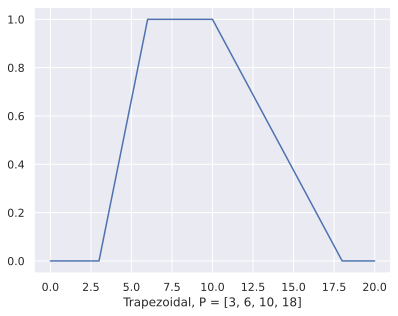

In [ ]:
y = fz.trapmf(x, [3, 6, 10, 18])
plt.plot(x, y)
plt.xlabel('Trapezoidal, P = [3, 6, 10, 18]')
plt.show()

<font color='red'>Question 6(b)</font>: Use the function trapmf to plot a triangle membership function the same as section 1 above. <font color='red'>(0.5 mark)</font>

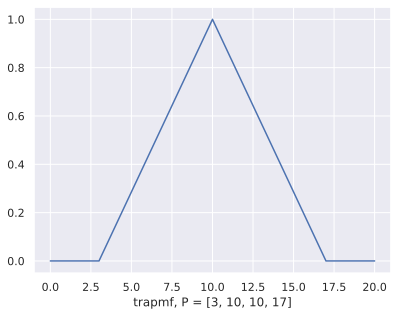

In [ ]:
# Modify the code here for Question 6(b). The original code here is not correct
y = fz.trapmf(x, [3, 10, 10, 17])
plt.plot(x, y)
plt.xlabel('trapmf, P = [3, 10, 10, 17]')
plt.show()

## Generalized Bell-shape Membership function

### Syntax

$y = \text{gbellmf} (x,[a, b, c])$

### Description

The generalized bell-shaped membership function of $x$ that depends on 3 parameters $a$, $b$ and $c$ as given by

$\begin{equation} f(x;a,b,c) = \frac{1}{1 + |\frac{x-c}{a}|^{2b}} \end{equation}$

- a controls the width of the bell.
- b controls the gradient of the bell's slopes.
- c controls the center value of the bell

<font color='red'>Question 7(a)</font>: Give the code to plot a generalized bell-shape membership function similar to the above trapezoidal membership function in 3. You can refer to the code after question 3 for some hints on similar membership functions of different types. <font color='red'>(0.5 mark)</font>


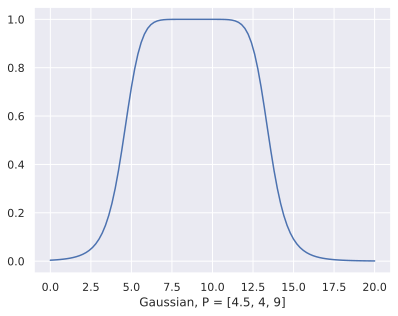

In [13]:
## Enter your code here for Question 7(a). Some codes are included for you. This code does not execute without modification
y = fz.gbellmf(x, [4.5, 4, 9])
plt.plot(x, y)
plt.xlabel('Gaussian, P = [4.5, 4, 9]')
plt.show()

## Bell-shape Membership functions

### Syntax

$y = \text{bellmf} (x,[a, b, c, d])$

### Description

The generalized bell-shaped membership function of $x$ that depends on 4 parameters $a$, $b$, $c$ and $d$ as given by

$\begin{equation} f(x;a,b,c)= \begin{cases} \frac{1}{1+\left\lvert \frac{x-c}{a} \right\rvert ^{2b}}, &\text{for $x < c$} \\ \frac{1}{1+\left\lvert \frac{x-c}{a} \right\rvert ^{2d}}, &\text{for $x \geq c$} \end{cases} \end{equation}$

- a controls the width of the bell.
- b controls the gradient of the bell's left slope.
- <font color='blue'>c</font> controls the midpoint of the bell.
- d controls the gradient of the bell's right slope.

<font color='red'>Question 7(b)</font>: bellmf function is not implemented in the Python Fuzzy Logic Library. Implement the function below. Hint: Look at gbellmf and trapmf implementation. Do not copy python code from elsewhere. <font color='red'>(0.5 mark)</font>

In [9]:
# Enter code for question 7(b) here
def bellmf(x, params):

    assert len(params) == 4, 'Generalized membership function must have four parameters.'
    a,b,c,d = params[0], params[1], params[2], params[3]

    membership = np.where(
        x < c,
        1 / (1 + (np.abs(x - c) / a) ** (2 * b)),
        1 / (1 + (np.abs(x - c) / a) ** (2 * d))
    )

    return membership

Now that you implemented the bellmf, we can plot a generalized bell-shape membership function similar to the above trapezoidal membership function in section 3. We can also plot the trapezoidal membership function overlapped with the bell-shape membership function in the same graph. <font color=blue>Hint: This plot serves as a hint to question 7(a).</font>


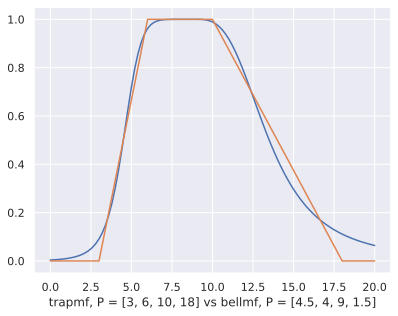

In [12]:
# This code will only run correctly if Question above is answered correctly
y = bellmf(x, [4.5, 4, 9, 1.5])
plt.plot(x, y)
y = fz.trapmf(x, [3, 6, 10, 18])
plt.plot(x, y)

plt.xlabel('trapmf, P = [3, 6, 10, 18] vs bellmf, P = [4.5, 4, 9, 1.5]')
plt.show()

# 6. Storing Membership function type and parameters

We need a way to store the type of membership functions, the parameters, and a generic function to evaluate memership function. Unfortunately the fismf class in Python Fuzzy Logic library is not working well, probably coded for an older version of Python. So we have to fix the class definition.

In [14]:
# This class replaces the fismf function in the Python Fuzzy Logic Library.
# This way of coding is highly not recommended, as the attributes of the class is not defined.
class fismf(object):
    def __init__(self, **attrs):
        self.__dict__.update(**attrs)
    def __getattr__(self, attr):
        return self.__dict__.get(attr, None)

The following code initializes a trapezoidal membership function with parameters, and plots it.

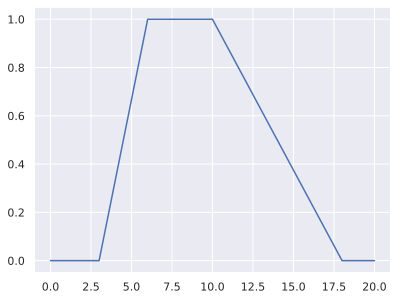

In [15]:
mymf = fismf(Type = 'trapmf', Parameters = [3, 6, 10, 18])
plt.plot(x, fz.evalmf.evalmf(mymf, x))

Given a value z=4, we can find the Fuzzy Membership function value from mymf.

In [16]:
# Code for finding a membership value from mymf
z=4
uz = fz.evalmf.evalmf(mymf, z)
print(uz)

[0.33333333]


Now we can also change mf to another type of membership function with different parameters and plot the membership function.

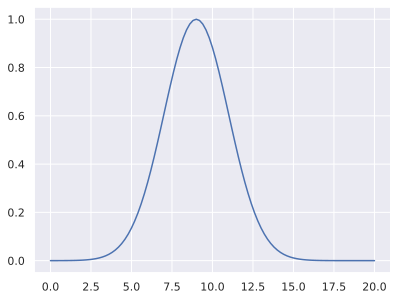

In [ ]:
# Code for plotting the membership functio
mymf = fismf(Type = 'gaussmf', Parameters = [2, 9])
plt.plot(x, fz.evalmf.evalmf(mymf, x))

# 7. Learning Vector Quantization (LVQ) algorithm

The Learning Vector Quantization (LVQ) algorithm is a lot like k-Nearest Neighbors. k-Nearest Neighbors need to keep a large database of training examples in order to make predictions. The LVQ  algorithm addresses uses a much smaller subset of patterns to represent the training data. These are called codebooks. We need to compute distances between the codebooks and the examples.

Thus we needed is a function to calculate the distance between two samples or rows in a dataset.

Rows of data are mostly made up of numbers and an easy way to calculate the distance between two rows or vectors of numbers is using the Euclidean distance measure.

The equation of Euclidean distance between vectors *x* and *y* with length *n* is defined as

\begin{equation*}
\sqrt{\sum_{k=1}^n (x_k - y_k)^2}
\end{equation*}

In other words, Euclidean distance is the square root of the sum of the squared differences between the two vectors.


In [17]:
# A function to calculate the Euclidean distance between two vectors
def euclidean_distance2(x1, x2):
    dist = 0.0
    for i in range(len(x1)):
        dist = dist + (x1[i] - x2[i])**2
    return sqrt(dist)

# A more effective way
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

Now create some dataset to look at euclidean distance

Sample 1: [-0.38926478 -2.02789747]
Sample 2: [2.85956689 3.7668524 ]
Sample 11: [-2.6626037  -0.69224866]
Sample 12: [-2.06054634 -3.24344408]


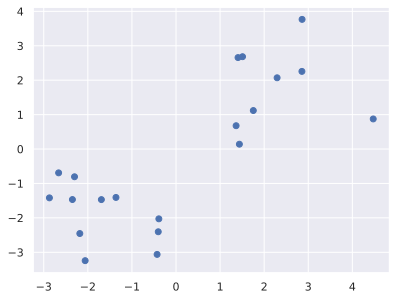

In [18]:
dataset = np.random.randn(20,2)
dataset[1:10]+=(+2)
dataset[10:20]+=(-2)
print("Sample 1:",dataset[0])
print("Sample 2:",dataset[1])
print("Sample 11:",dataset[10])
print("Sample 12:",dataset[11])
plt.scatter(dataset[:,0], dataset[:,1])

Compute the euclidean distance between Sample 1 and Sample 2

In [ ]:
dist1 = euclidean_distance2(dataset[0],dataset[1])
print("Distance 1:",dist1)

Distance 1: 4.285505812302367


In [ ]:
dist2 = euclidean_distance(dataset[0],dataset[1])
print("Distance 2:",dist2)

Distance 2: 4.285505812302367


# 8. Find the Winner

The Winner weight, or so called the winning codebook, also called Best Matching Vector, is the weight or codebook that is most similar to a new piece of data.

To identify the Winner for a new piece of data within a dataset we must first calculate the distance between each weight or codebook to the new piece of data. We can do this using our distance function above.

Once distances are calculated, we must sort all of the weights or codebooks by their distance to the new data. We can then return most similar weight or codebook vector with the smallest distance to the new data.

We can do this by keeping track of the distance for each record in the dataset as a tuple, sort the list of tuples by the distance (in descending order) and then retrieve the winner.

Below is a function named get_best_matching_unit() that implements this.

In [19]:
# Locate the best matching unit
def find_winner(weights, test_sample):
    distances = list()
    for weight_index, weight in enumerate(weights):
        dist = euclidean_distance(weight, test_sample)
        distances.append((weight_index, dist))
    distances.sort(key=lambda tuple: tuple[1])
    return distances[0][0]

The euclidean_distance() function in section 1 is used to calculate the distance between each weight or codebook with the new test_sample.

The list of codebook vectors and distance tuples is sorted where a custom key is used ensuring that the second item in the tuple (tuple[1]) is used in the sorting operation.

Finally, the most similar weight or codebook vector is returned as the winner.

We can test this function with the small dataset prepared in section 1.

In [ ]:
winner=find_winner([dataset[i] for i in [0,10]],dataset[0])
print("Winner :",winner)
winner=find_winner([dataset[i] for i in [0,10]],dataset[10])
print("Winner :",winner)

Winner : 0
Winner : 1


# 9. Initialize LVQ Weight Vectors

Before we train a set of weights or codebook vectors, we have to initialize the weights.

We can initialize it with patterns constructed from random features in the training dataset. This is one way to initialize it. Another way is to randomize the weights to a certain range of the input dataset instead of using one of the samples. There are advantages and disadvantages to different ways of initializing the weights.

Below is a function named random_weight() that picks a random sample from the training data.

In [20]:
# Assign a random codebook vector from the training data
def random_weight(traindata):
    n_records = len(traindata)
    weight = traindata[randrange(n_records)]
    return weight

We can test this function with the small dataset prepared in section 1.

In [21]:
weight=random_weight(dataset)

print("Weight:",weight)

Weight: [1.50911063 2.6826033 ]


# 10. Training LVQ Weight Vectors

After the weights are initialized to a random set, they have to be trained using the training data. This is done iteratively.

The training process is repeated for a fixed number of epochs, or so called exposures of the training data. In an epoch, each training sample is used to update the set of weight or codebook vectors.

For a training pattern, a winner vector is updated to move it closer or further away. A winner is found for each training pattern and only this winner is updated. The difference between the training pattern and the winner is calculated as the error.

The amount that the winner is adjusted is controlled by a learning rate. This is the amount of change made to the winner. For example, a learning rate of 0.3 means that the winner are only moved by 30% of the error or difference between the training data and the winner.

The learning rate is also adjusted so that it has maximum effect in the first epoch and the effect lessen as training continues until it has a minimal effect in the final epoch. This is called a linear decay learning rate commonly used in artificial neural networks.

Below is a function named train_weights() that implements the procedure for training a set of weight vectors given a training dataset.

The function takes 3 additional arguments to the training dataset, the number of weights or codebook vectors to create and train, the initial learning rate and the number of epochs.

The function keeps track of the sum squared error each epoch and prints a message showing the epoch number, effective learning rate and sum squared error score. This is helpful when debugging the training function or the specific configuration for a given prediction problem. The random_weight function is used to initialize the codebook vectors and the find_winner function is used to find the winner for each training pattern within an epoch.


In [22]:
# Train a set of codebook vectors
def train_LVQ(traindata, weights, lrate, epochs):
    print("Weights:",weights)
    for epoch in range(epochs):
        rate = lrate * (1.0-(epoch/float(epochs)))
        sum_error = 0.0
        for row in traindata:
            winner_index = find_winner(weights, row)
            #print("Winner:",winner)
            error = (row - weights[winner_index])
            sum_error = sum_error + sqrt(sum(error**2))
            # This line has an error in changing the original dataset
            # weights[winner_index] += rate * error
            weights[winner_index] = weights[winner_index] + rate * error
            #print("Winner:",winner)
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, rate, sum_error))
    print('Final weights: ', weights)
    return weights


Run this to train a set of 2 weight vectors for 20 epochs with an initial learning rate of 0.3. The details are printed each epoch and the set of 2 codebook vectors learned from the training data is displayed.

We can see that the changes to learning rate meet our expectations explored above for each epoch. We can also see that the sum squared error each epoch does continue to drop at the end of training and that there may be an opportunity to tune the example further to achieve less error

Initial weights: [array([2.85956689, 3.7668524 ]), array([2.85956689, 3.7668524 ])]
Weights: [array([2.85956689, 3.7668524 ]), array([2.85956689, 3.7668524 ])]
>epoch=0, lrate=0.300, error=40.473
>epoch=1, lrate=0.270, error=30.181
>epoch=2, lrate=0.240, error=27.282
>epoch=3, lrate=0.210, error=27.030
>epoch=4, lrate=0.180, error=26.663
>epoch=5, lrate=0.150, error=26.286
>epoch=6, lrate=0.120, error=25.907
>epoch=7, lrate=0.090, error=25.528
>epoch=8, lrate=0.060, error=25.152
>epoch=9, lrate=0.030, error=24.781
Final weights:  [array([-1.70414256, -1.8475644 ]), array([2.28203213, 1.74434208])]
Weights: [array([-1.70414256, -1.8475644 ]), array([2.28203213, 1.74434208])]


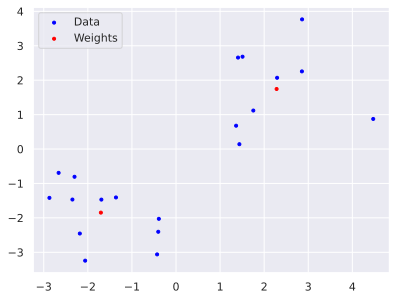

In [23]:
n_weights = 2
weights = [random_weight(dataset) for i in range(n_weights)]
seed(1)
learn_rate = 0.3
n_epochs = 10
print("Initial weights:",weights)
weights = train_LVQ(dataset, weights, learn_rate, n_epochs)
print("Weights:",weights)
nweights=np.array(weights)
area = np.pi*3
plt.scatter(dataset[:,0], dataset[:,1],area,c="blue",label="Data")
plt.scatter(nweights[:,0], nweights[:,1],area,c="red",label="Weights")
plt.legend(loc=2)
plt.show()

Now what happens if we change the random initialization of weights

Initial weights: [array([-0.38926478, -2.02789747]), array([2.85956689, 3.7668524 ])]
Weights: [array([-0.38926478, -2.02789747]), array([2.85956689, 3.7668524 ])]
>epoch=0, lrate=0.300, error=29.515
>epoch=1, lrate=0.270, error=27.689
>epoch=2, lrate=0.240, error=27.413
>epoch=3, lrate=0.210, error=27.042
>epoch=4, lrate=0.180, error=26.665
>epoch=5, lrate=0.150, error=26.286
>epoch=6, lrate=0.120, error=25.907
>epoch=7, lrate=0.090, error=25.528
>epoch=8, lrate=0.060, error=25.152
>epoch=9, lrate=0.030, error=24.781
Final weights:  [array([-1.70414263, -1.84756445]), array([2.28203087, 1.74433671])]
Weights: [array([-1.70414263, -1.84756445]), array([2.28203087, 1.74433671])]


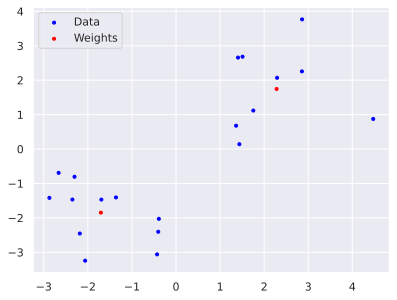

In [24]:
weights = [dataset[i] for i in [0,1]]
print("Initial weights:",weights)
weights = train_LVQ(dataset, weights, learn_rate, n_epochs)
print("Weights:",weights)
nweights=np.array(weights)
area = np.pi*3
plt.scatter(dataset[:,0], dataset[:,1],area,c="blue",label="Data")
plt.scatter(nweights[:,0], nweights[:,1],area,c="red",label="Weights")
plt.legend(loc=2)
plt.show()

<font color='red'>Question 8(a)</font>: What does the initialization of weights impact the LVQ algorithm? <font color=blue>Hint: Run it a few times to observe. Running 1 or 2 times are not sufficient. </font><font color='red'>(0.5 mark)</font>

The ordering of the output weight vector changes but the magnitude remain the same.

<font color='red'>Question 8(b)</font>: What other parameters also affect the LVQ algorithm? Show with code. <font color='red'>(0.5 mark)</font>

1. Learning Rate
2. Epoch

In [25]:
def change_parameters(lrate, epochs, dataset):
    weights = [dataset[i] for i in [0,1]]
    output_weights = train_LVQ(dataset, weights, lrate, epochs)
    return output_weights

In [ ]:
output_weights_lr_1 = change_parameters(0.3, 30, dataset)
output_weights_lr_2 = change_parameters(0.001, 30, dataset)

output_weights_epoch_1 = change_parameters(0.3, 30, dataset)
output_weights_epoch_2 = change_parameters(0.3, 2, dataset)

In [ ]:
print('Changing Learning Rate')
print('Using Learning Rate of 0.3: ', output_weights_lr_1)
print('Using Learning Rate of 0.001: ', output_weights_lr_2)

print()

print('Changing Epochs')
print('Using Epochs of 30: ', output_weights_epoch_1)
print('Using Epochs of 2: ', output_weights_epoch_2)

Changing Learning Rate
Using Learning Rate of 0.3:  [array([-2.13044105, -1.76343762]), array([2.41820562, 2.17318359])]
Using Learning Rate of 0.001:  [array([-1.1014261 ,  0.34500541]), array([2.60567414, 3.004099  ])]

Changing Epochs
Using Epochs of 30:  [array([-2.13044105, -1.76343762]), array([2.41820562, 2.17318359])]
Using Epochs of 2:  [array([-2.30098266, -1.82524989]), array([2.50851322, 2.07229924])]


# 11. Generating Fuzzy Membership functions using LVQ algorithm

In the example above, there are 2 winning vectors, each vector has 2 dimensions. This can be view as 2 inputs with 2 membership functions each.


<font color='red'>Question 9</font>: Use the winning vectors to generate Gaussian membership functions for dimension 2. Plot the 2 membership functions, one for each winning vector on the same plot using different colors. <font color='red'>(1 mark)</font>

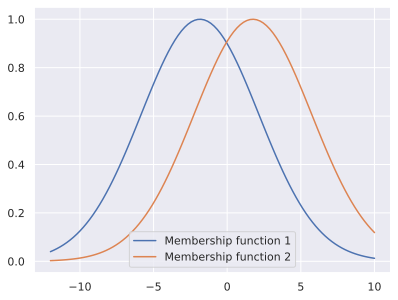

In [41]:
# Enter code for Question 9 here
x = np.linspace(-12, 10, 100)
membership_1 = fz.gaussmf(x, [4, nweights[0,1]])
membership_2 = fz.gaussmf(x, [4, nweights[1,1]])
plt.plot(x, membership_1, label='Membership function 1')
plt.plot(x, membership_2, label='Membership function 2')
plt.legend()
plt.show()

<font color='red'>Question 10</font>. Add code to modify the Gaussian membership function in question 9 to triangle membership functions so that they are interpretable and satisfy coverage, normalized, convex and ordered. Hint: Refer to lecture notes on interpretability of Fuzzy membership functions. <font color='red'>(1 mark)</font>

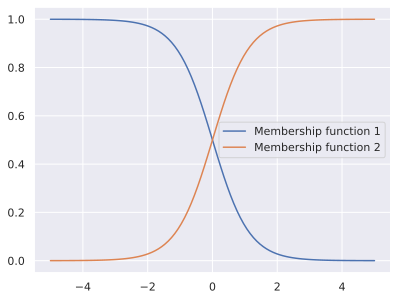

In [50]:
# Enter code for Question 10 here
x = np.linspace(-5, 5, 100)

membership_1 = fz.gaussmf(x, [1.5, -2])
membership_2 = fz.gaussmf(x, [1.5, 2])

# Normalize them
membership_norm_1 = membership_1 / (membership_1 + membership_2)
membership_norm_2 = membership_2 / (membership_1 + membership_2)

plt.plot(x, membership_norm_1, label='Membership function 1')
plt.plot(x, membership_norm_2, label='Membership function 2')
plt.legend()
plt.show()